## 기사 단어뽑기

In [30]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re


from konlpy.tag import Twitter
from urllib.request import urlopen
from lxml import html
from collections import Counter

import random
import pytagcloud      # requires Korean font support
import webbrowser

from datetime import datetime, timedelta
import nltk

In [31]:
Thema = input("주제를 입력하세요.  ex) society \n")
end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
choose = input("제목만 가져오려면 : 1\n본문까지 가져오려면 : 2 \n")

end_date = end_date[:4] + '.' + end_date[4:6] + '.' + end_date[6:]
start_date = start_date[:4] + '.' + start_date[4:6] + '.' + start_date[6:]

주제를 입력하세요.  ex) society 
economy
시작 날짜를 입력하세요.  ex) 20181007 
20180901
마지막 날짜를 입력하세요.  ex) 20181115 
20181115
제목만 가져오려면 : 1
본문까지 가져오려면 : 2 
1


In [32]:
if choose == '1':
    word = pd.read_csv('./TeamMission/segye_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
else:
    word = pd.read_csv('./TeamMission/segye_%s_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')

del word['Unnamed: 0']

In [33]:
word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 2 columns):
Title    2037 non-null object
Date     2037 non-null object
dtypes: object(2)
memory usage: 31.9+ KB


In [34]:
word.head(10)

,Title,Date
0,"준오헤어, 50%할인 이벤트 수능수험생 준오에 반하다’",2018.11.15
1,"삼성바이오로직스 회계 조작 최초 제기 홍순탁 회계사 ""3억 아파트로 20억 번 꼴""",2018.11.15
2,"BBQ, bhc 상대 1천억원 손배 청구…끝나지 않는 치킨 전쟁",2018.11.15
3,반도체 힘으로 버틴 3분기…4분기 이후 암울,2018.11.15
4,"비트코인 등 암호화폐 일제 폭락…연중 최저치 기록, 국내 거래도 급격한 하락세",2018.11.15
5,삼바 고의 분식회계…본사·공장있는 인천도 파장 주시,2018.11.15
6,"""연체 바로갚아도 신용등급에 악재…휴대폰 할부미납도 불이익""",2018.11.15
7,내년 1월 공공택지 분양가 공개항목 12개→62개 확대,2018.11.15
8,내년부터 외과 레지던트 수련기간 4년→3년 단축,2018.11.15
9,"메가스터디의 수능 인강 프리패스, “2020 0원 메가패스” 환급 대학 전격 확대",2018.11.15


In [35]:
word.tail(10)

,Title,Date
2027,"도시재생 뉴딜사업 99곳, 주목할 곳은",2018.09.01
2028,올 추석 해외 인기지역 항공권 가격 작년보다 저렴해져,2018.09.01
2029,미국 고용 호조 이면에는 소득 격차 심화,2018.09.01
2030,[김현주의 일상 톡톡] 평당 1억 시대…월급 모아서는 서울 아파트 언감생심,2018.09.01
2031,"코레일, 폭염 연례화 대비 집중 투자계획 마련",2018.09.01
2032,"한돈협회 아프리카돼지열병(ASF), 국민과 함께해야 막을 수 있다!",2018.09.01
2033,"서부발전, 서울대 EDRC와 4차산업 기술협력 맞손",2018.09.01
2034,"농식품분야 구직자, 이번 주말은 서울 DDP로",2018.09.01
2035,진짜 프리미엄은 ‘빌트인’…삼성전자·LG전자 초고가 가전 놓고 한판,2018.09.01
2036,[이코노 브리핑] LG화학 70년史 ‘디지털역사관’ 오픈 외,2018.09.01


In [36]:
len(word)

2037

#### DataFrame -> List -> String

In [37]:
words = str()

start = datetime.now()

if choose == '1':
    for i in range(len(list(word['Title']))):
        words += str(list(word['Title'])[i])
else:
    for i in range(len(list(word['News']))):
        words += str(list(word['News'])[i])

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

총 계산 시간: 0:00:00.180010


In [38]:
words[:1000]

'준오헤어, 50%할인 이벤트 수능수험생 준오에 반하다’삼성바이오로직스 회계 조작 최초 제기 홍순탁 회계사 "3억 아파트로 20억 번 꼴"BBQ, bhc 상대 1천억원 손배 청구…끝나지 않는 치킨 전쟁반도체 힘으로 버틴 3분기…4분기 이후 암울비트코인 등 암호화폐 일제 폭락…연중 최저치 기록, 국내 거래도  급격한 하락세삼바 고의 분식회계…본사·공장있는 인천도 파장 주시"연체 바로갚아도 신용등급에 악재…휴대폰 할부미납도 불이익"내년 1월 공공택지 분양가 공개항목 12개→62개 확대내년부터 외과 레지던트 수련기간 4년→3년 단축메가스터디의 수능 인강 프리패스, “2020 0원 메가패스” 환급 대학 전격 확대라이프스타일 힐팩, 수요 특가 이벤트 1차에 이어 2차까지 완판 기록9·13대책 발표 두 달…"2억∼3억원 내려도 집 안 팔려""관세는 내렸는데…수입 초콜릿·고가 맥주 가격은 오히려 올라"㈜한라 천진법인 청산에 따른 243억원 투자금 회수오티스, 2018 한국국제승강기엑스포서 차세대 혁신기술 선보여도공, 내년 2월부터 고속도로 모든 휴게공간에 무료 와이파이서비스 제공코레일, 국내 유일‘철도교통 관제교육 기관’ 지정 박차일본 농림어업신용보증기금, 한국 농신보 포항센터 방문이베이코리아·우정사업본부, 소상공인·지역경제 활성화 위한 업무협약 체결[이코노 브리핑] KB금융 대국민안전문화확산 MOU 외‘계열사 고의 누락’ 이건희 회장 고발中, 한국行 단체관광 온라인 판매 허용정부 “치매연구 10년간 5826억 투입”목표주가 하향 조정 … 바이오株 약세 전망이재용 경영권 승계로 불똥 튀나고의 분식 결론… 당국·삼바 법정공방 예고“크기는 소형화, 기술은 고도화”… 데이터 처리 8배올 순익 11년 만에 최고…춤추는 은행들전국 14곳 8000억 투입 도시재생사업중대한 항공사고·갑질 항공사, 신규 운수권 신청자격 2년간 박탈한국경제연구원 "최저임금 인상에 일자리 47만개 감소"“기업 생산성 높여야 수출 통한 고용증대 효과”실업급여 설명회장 북적…경제 허리 4050 무너지다고의 분

In [39]:
len(words)

59732

#### 트위터

In [40]:
start = datetime.now()

twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

C:\python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


총 계산 시간: 0:00:03.666210


In [41]:
count3.most_common()

[('한국', 104),
 ('명', 69),
 ('대출', 63),
 ('기업', 61),
 ('금융', 59),
 ('투자', 57),
 ('경제', 55),
 ('정부', 55),
 ('시장', 54),
 ('삼성', 51),
 ('일자리', 49),
 ('코노', 48),
 ('브리핑', 48),
 ('위', 47),
 ('지원', 47),
 ('고용', 44),
 ('중', 44),
 ('성장', 44),
 ('등', 42),
 ('외', 42),
 ('최대', 42),
 ('주택', 42),
 ('산업', 42),
 ('차', 41),
 ('출시', 41),
 ('김동연', 41),
 ('추석', 41),
 ('농협', 40),
 ('국내', 39),
 ('혁신', 39),
 ('세', 39),
 ('기술', 37),
 ('서울', 37),
 ('규제', 37),
 ('더', 37),
 ('확대', 36),
 ('배', 36),
 ('톡톡', 35),
 ('부동산', 35),
 ('해외', 35),
 ('증가', 35),
 ('금리', 35),
 ('은행', 34),
 ('대책', 33),
 ('것', 33),
 ('일상', 32),
 ('올해', 32),
 ('감소', 31),
 ('최고', 30),
 ('인상', 30),
 ('수출', 30),
 ('경기', 30),
 ('개', 29),
 ('서비스', 29),
 ('김현주', 29),
 ('상승', 29),
 ('전자', 29),
 ('집값', 29),
 ('사업', 28),
 ('첫', 28),
 ('세계', 28),
 ('제', 28),
 ('롯데', 28),
 ('소득', 27),
 ('메르스', 27),
 ('발표', 26),
 ('업계', 26),
 ('개최', 26),
 ('진행', 26),
 ('로', 26),
 ('드론', 26),
 ('률', 25),
 ('개월', 25),
 ('이상', 25),
 ('내년', 24),
 ('안', 24),
 ('가격', 24),
 ('지역',

#### DataFrame 만들기 및 저장

In [42]:
common_word = pd.DataFrame({'word' : count3.most_common()})

In [43]:
common_word

,word
0,"(한국, 104)"
1,"(명, 69)"
2,"(대출, 63)"
3,"(기업, 61)"
4,"(금융, 59)"
5,"(투자, 57)"
6,"(경제, 55)"
7,"(정부, 55)"
8,"(시장, 54)"
9,"(삼성, 51)"


#### 단어 저장

In [44]:
if choose == '1':
    common_word.to_csv('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
    common_word.to_csv('./TeamMission/segye_%s_title_word_euc_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='euc-kr')
else:
    common_word.to_csv('./TeamMission/segye_%s_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
    common_word.to_csv('./TeamMission/segye_%s_word_euc_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='euc-kr')

#### 단어 분류

In [45]:
one_words = []
two_words = []
etc_words = []

for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(two_words), len(etc_words)

(1973, 10071, 2784)

In [46]:
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

len(one_words), len(two_words), len(etc_words)

(368, 3021, 1279)

In [18]:
for word in one_words:
    print(word, end='\t')

돈	옴	체	작	슨	웨	워	공	욕	덩	랄	잠	안	날	케	던	갑	꼭	밥	헌	취	현	꿰	묘	핸	버	복	황	잎	율	값	줌	렬	외	렌	야	윈	극	똑	친	혜	빚	격	임	짝	약	묵	객	빵	휘	구	쉰	삽	괌	잣	토	슬	매	절	셀	툰	적	년	쪽	놨	스	뉴	잔	칭	샵	삭	린	밖	롱	페	핏	낼	엘	움	찍	닻	견	잭	리	며	침	댁	컬	싹	꿀	층	꽤	널	픽	뇌	벌	집	글	룸	철	샤	겸	톨	벨	새	숏	힌	것	강	번	뚝	촉	푹	켜	왕	텐	젬	붐	택	밤	퐁	덧	겨	탕	역	킨	저	듯	웰	궤	릭	함	팁	납	찰	성	쉐	려	광	퀵	필	펨	회	나	균	뷰	꽉	길	숯	헬	넉	몸	레	귀	샛	이	패	죄	티	익	롤	삶	놈	햄	초	곤	범	멕	앗	탓	발	빅	펫	숨	컨	냔	렛	착	편	킬	헤	즌	콘	짊	골	쿱	틸	윗	품	틀	쉬	점	천	확	너	빗	햇	밭	알	롯	륙	숱	목	설	앤	김	급	숲	파	쯤	쿠	톤	펜	당	슈	빨	탑	템	퀸	텅	금	못	런	녕	속	비	뻥	닭	핑	살	게	빈	진	치	쥐	씨	엮	캣	쉘	헛	식	세	렀	륜	겉	흐	측	끝	훈	췌	텍	뼈	섭	쌀	처	염	획	망	굿	찜	캔	왓	봉	롭	조	셋	칩	놀	니	잡	료	션	삿	족	밑	재	간	몽	칸	결	척	증	짱	실	넬	웬	모	숍	난	울	앞	젤	짓	뭐	정	주	솔	록	곱	꼴	각	컴	률	환	람	랏	용	텔	의	붓	블	장	채	숙	책	맘	만	즉	옆	팬	츄	듬	후	낫	민	풍	병	추	넷	달	콤	행	씰	풀	르	온	농	큐	테	영	응	과	땅	징	웹	팅	노	엣	폐	십	머	벅	흥	네	맨	맥	명	틴	사	콩	무	변	때	뚜	칠	엽	접	닉	콰	축	탈	존	홑	냉	핫	걸	밍	악	닛	입	맵	령	펌	면	양	더	셈	마	형	을	떄	틈	운	청	쿨	군	엎	꼬	맹	감	가	왈	굴	캡	덜	차	습	랭	팝	호	곡	빼	내	옷	기	중	딕	닷	꽃	볼	쇼	늘	폭	딸	효	혹	램	윙	쇄	트	담	오	밸	흠	쌍	멋	뀐	탁	밀	닝	를	졸	예	곗	힘	뒤	투	해	위	좀	혈	딜	곽	향	완	빽	렉	츠	관	홈	콜	몬	털	태	윤	죽	샷	심	칙	고	석	말	곪	다	답	셔	홍	낮	빔	여	찌	턱	압	팩	술	곁	포	욜	섬	육	생	총	링	루	꿈	므	녹	낚	벼	뮤	

#### stop_words 생성

In [47]:
stop_words = []
sw_time = ['오늘', '어제', '미래', '내일', '시작', '하루', '올해', '오전', '오후', '하루', '이번', '다시', '마지막','개월', '내년']
sw_various = ['알림','소식', '궂긴', '기업', '회장','최대','대통령','한국','청와대','대표','포토','의원','정부','정치','후보','추진','이유','달라','만난','누구','사진','직접','마련','리선']
sw_region = ['서울','대전','대구','부산','울산','광주','제주','제주도']

stop_words.extend(one_words)
stop_words.extend(sw_time)
stop_words.extend(sw_various)
stop_words.extend(sw_region)
stop_words.extend(one_words)

#### stop_words 빼기

In [48]:
nouns = [word for word in nouns3 if word not in stop_words]
len(nouns)

12309

In [49]:
nouns[:100]

['헤어',
 '할인',
 '이벤트',
 '수능',
 '수험생',
 '바이오',
 '직스',
 '회계',
 '조작',
 '최초',
 '제기',
 '홍순',
 '회계사',
 '아파트',
 '상대',
 '손배',
 '청구',
 '치킨',
 '전쟁',
 '반도체',
 '이후',
 '비트코인',
 '암호',
 '화폐',
 '일제',
 '폭락',
 '연중',
 '최저',
 '기록',
 '국내',
 '거래',
 '하락',
 '삼바',
 '고의',
 '분식회계',
 '본사',
 '공장',
 '인천',
 '파장',
 '주시',
 '연체',
 '바로',
 '신용등급',
 '악재',
 '휴대폰',
 '할부',
 '미납',
 '불이익',
 '택지',
 '분양',
 '개항',
 '확대',
 '외과',
 '레지던트',
 '수련',
 '기간',
 '단축',
 '메가스터디',
 '수능',
 '인강',
 '프리',
 '패스',
 '메가패스',
 '환급',
 '대학',
 '전격',
 '확대',
 '라이프스타일',
 '힐팩',
 '수요',
 '이벤트',
 '완판',
 '기록',
 '대책',
 '발표',
 '관세',
 '수입',
 '초콜릿',
 '고가',
 '맥주',
 '가격',
 '오히려',
 '한라',
 '진법인',
 '청산',
 '자금',
 '회수',
 '티스',
 '국제',
 '승강기',
 '엑스포',
 '차세대',
 '혁신',
 '기술',
 '도공',
 '고속도로',
 '모든',
 '휴게',
 '공간',
 '무료']

#### 워드클라우드 만들기

In [50]:
token = nltk.Text(nouns, name='기사')
type(token), len(token)

(nltk.text.Text, 12309)

In [51]:
token.vocab().most_common(30)

[('대출', 63),
 ('금융', 59),
 ('투자', 57),
 ('경제', 55),
 ('시장', 54),
 ('삼성', 51),
 ('일자리', 49),
 ('코노', 48),
 ('브리핑', 48),
 ('지원', 47),
 ('고용', 44),
 ('성장', 44),
 ('주택', 42),
 ('산업', 42),
 ('출시', 41),
 ('김동연', 41),
 ('추석', 41),
 ('농협', 40),
 ('국내', 39),
 ('혁신', 39),
 ('기술', 37),
 ('규제', 37),
 ('확대', 36),
 ('톡톡', 35),
 ('부동산', 35),
 ('해외', 35),
 ('증가', 35),
 ('금리', 35),
 ('은행', 34),
 ('대책', 33)]

#### 워드클라우드 한글폰트 설정

In [52]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [53]:
data = token.vocab().most_common(1000)
len(data)

1000

In [54]:
data[:10]

[('대출', 63),
 ('금융', 59),
 ('투자', 57),
 ('경제', 55),
 ('시장', 54),
 ('삼성', 51),
 ('일자리', 49),
 ('코노', 48),
 ('브리핑', 48),
 ('지원', 47)]

#### data를 딕셔너리 형태로 변환

In [55]:
dict_data = dict(data)
len(dict_data)

1000

#### 워드클라우드 그리기

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

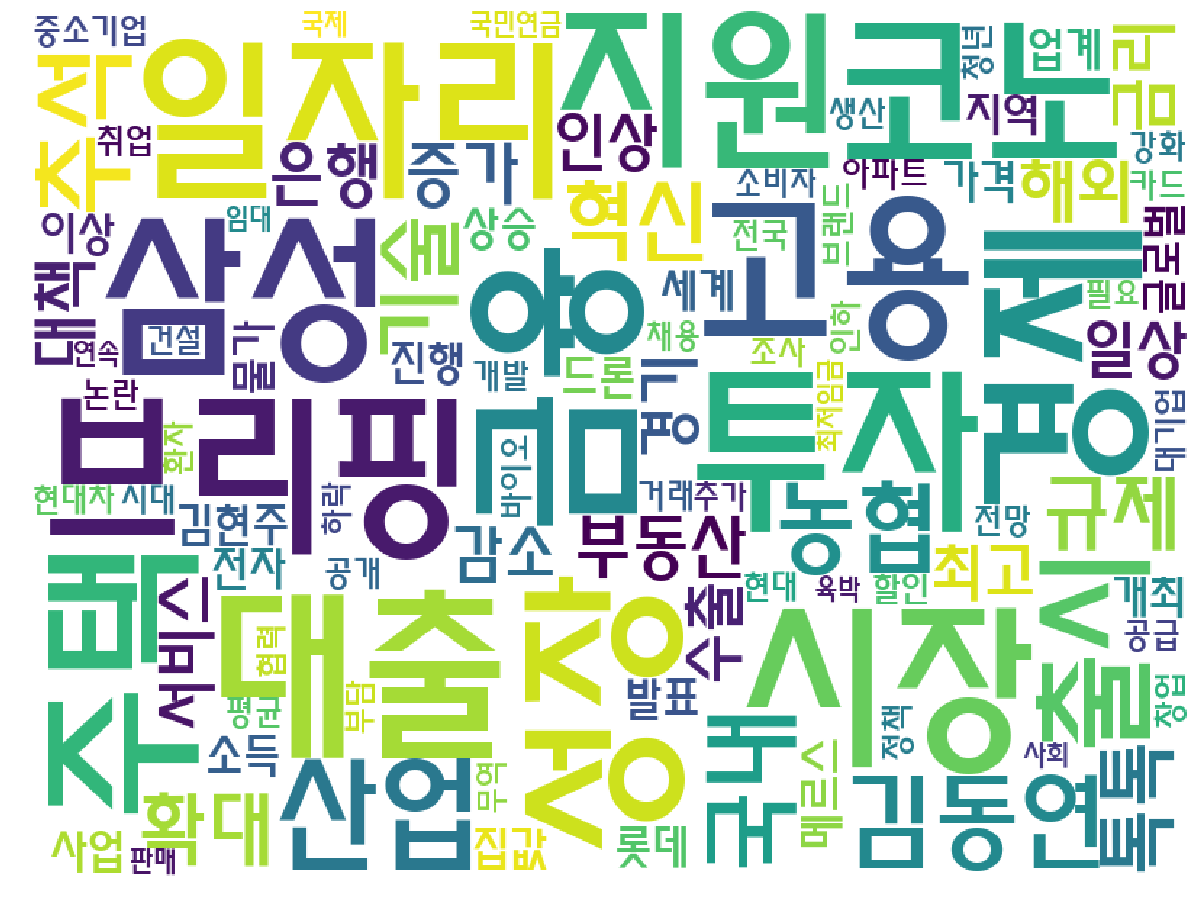

In [57]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

if choose == '1':
    save_img = 'images/segye_%s_title_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
else:
    save_img = 'images/segye_%s_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)